# Análisis Naive Bayes - Predicción de precio de propiedades
InmoValor S.A. es una empresa innovadora del sector inmobiliario que ha apostado por la transformación digital para ofrecer valoraciones precisas y objetivas de propiedades. Ante un mercado dinámico y competitivo, la compañía ha adoptado técnicas avanzadas de análisis y modelos de regresión para estimar el valor de inmuebles basándose en un amplio conjunto de datos que recopila información detallada de viviendas. Este dataset incluye variables clave como ubicación, tamaño, calidad constructiva y otros factores determinantes, lo que permite desarrollar modelos predictivos capaces de reflejar con mayor exactitud las condiciones del mercado.

Autores:
- Gerson Ramírez
- Diego Valenzuela

Repo: https://github.com/Diegoval-Dev/DM-HDT5

In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv("./processed_data.csv")

print(df.head())


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  ...  3SsnPorch  ScreenPorch  PoolArea  \
0            3          0          4  ...          0            0         0   
1            3          0          2  ...          0            0         0   
2            3          0          4  ...          0            0         0   
3            3          0          0  ...          0            0         0   
4            3          0          2  ...          0            0         0   

   MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  PriceCategory  
0        0       2

## Identificación de valores nulos y tipos de datos

Se analiza la presencia de valores nulos en el dataset y se identifican los tipos de datos de cada columna. Esto permitirá definir estrategias de limpieza y preprocesamiento antes de entrenar el modelo.

In [3]:
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Id               0
HalfBath         0
GarageType       0
Fireplaces       0
Functional       0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
PriceCategory    0
Length: 77, dtype: int64

## División del conjunto de datos en entrenamiento y prueba

Se separa el dataset en dos subconjuntos: entrenamiento (70%) y prueba (30%). La variable objetivo es `SalePrice`. Esta división permitirá evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.


In [4]:
X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 
            '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
            'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
            'MoSold', 'YrSold']

X_filtered = df[features]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, train_size=0.7, random_state=42)


## Modelos de referencia para predicción de precio de propiedades


### Regresión lineal

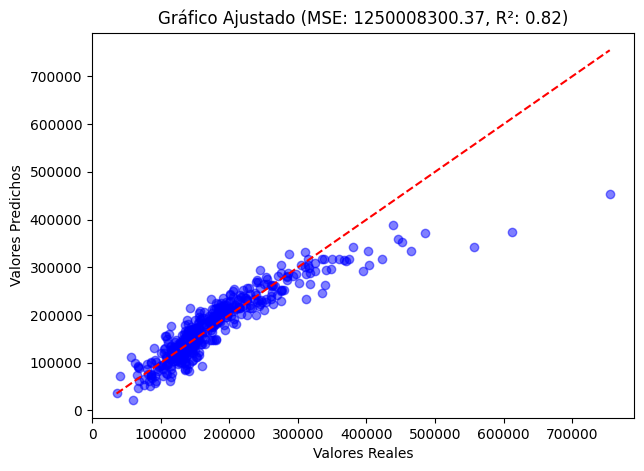

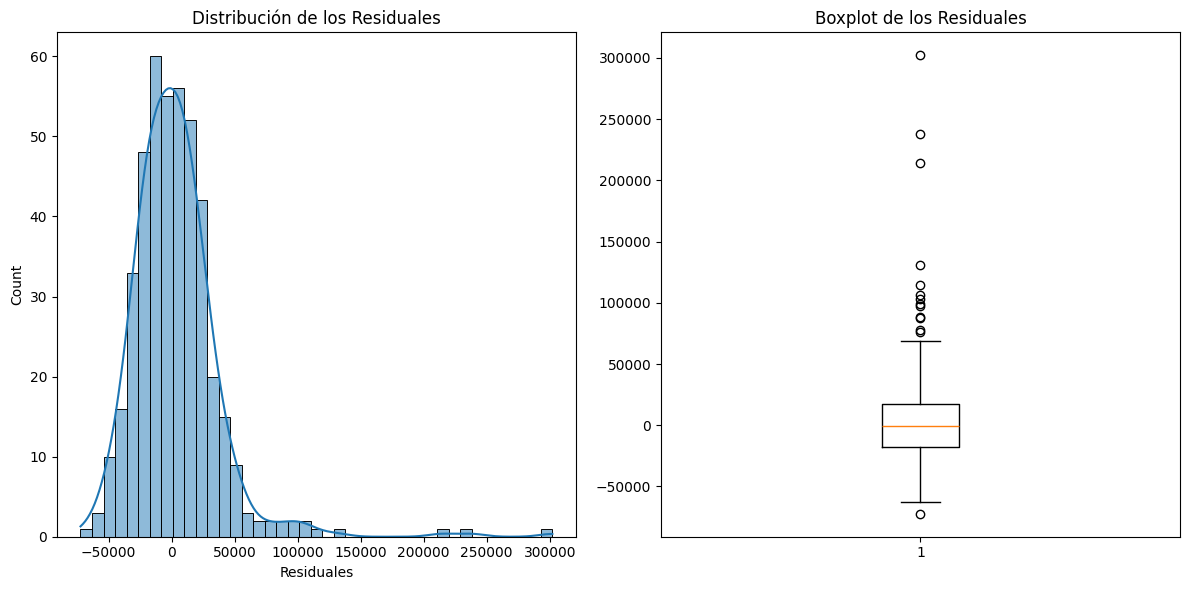

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          3.86e-319
Time:                        19:15:52   Log-Likelihood:                -12123.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     988   BIC:                         2.447e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.168e+05   1.73e+06     -0.357

In [5]:
lm_filtered = LinearRegression()
lm_filtered.fit(X_train, y_train)

y_pred_filtered = lm_filtered.predict(X_test)

mse_filtered = mean_squared_error(y_test, y_pred_filtered)
r2_filtered = r2_score(y_test, y_pred_filtered)

X_train_sm_filtered = sm.add_constant(X_train)  
modelo_filtered = sm.OLS(y_train, X_train_sm_filtered).fit()

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_filtered, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"Gráfico Ajustado (MSE: {mse_filtered:.2f}, R²: {r2_filtered:.2f})")
plt.show()

residuales_filtered = y_test - y_pred_filtered

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuales_filtered, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")

plt.subplot(1, 2, 2)
plt.boxplot(residuales_filtered)
plt.title("Boxplot de los Residuales")

plt.tight_layout()
plt.show()

print(modelo_filtered.summary())

mse_train = mean_squared_error(y_train, lm_filtered.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred_filtered)

print(f"MSE en Entrenamiento: {mse_train:.4f}")
print(f"MSE en Prueba: {mse_test:.4f}")

if mse_test > (mse_train * 1.5):
    print("⚠️ Posible Overfitting: El error en prueba es significativamente mayor que en entrenamiento.")
else:
    print("✅ No hay signos de Overfitting: El error en prueba es similar al de entrenamiento.")



In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Árbol de Decisión para Regresión

Se entrena un modelo de Árbol de Decisión para predecir `SalePrice`. Se ajusta la profundidad del árbol (`max_depth=5`) para evitar sobreajuste y se evalúa su rendimiento en el conjunto de prueba.


Árbol de Decisión - MSE: 1529533830.0543764, RMSE: 39109.25504345968, R2: 0.780809217752831


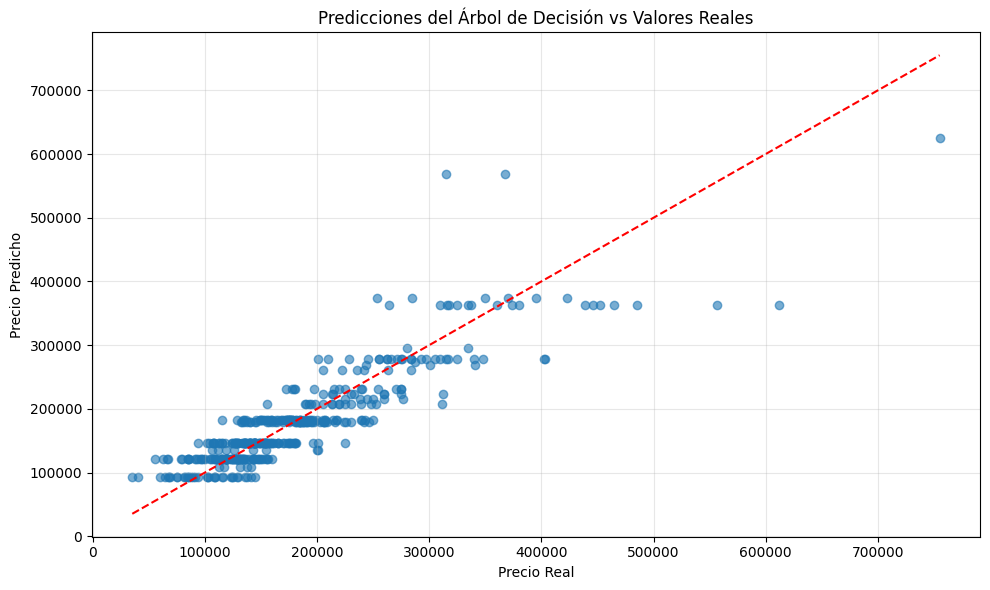

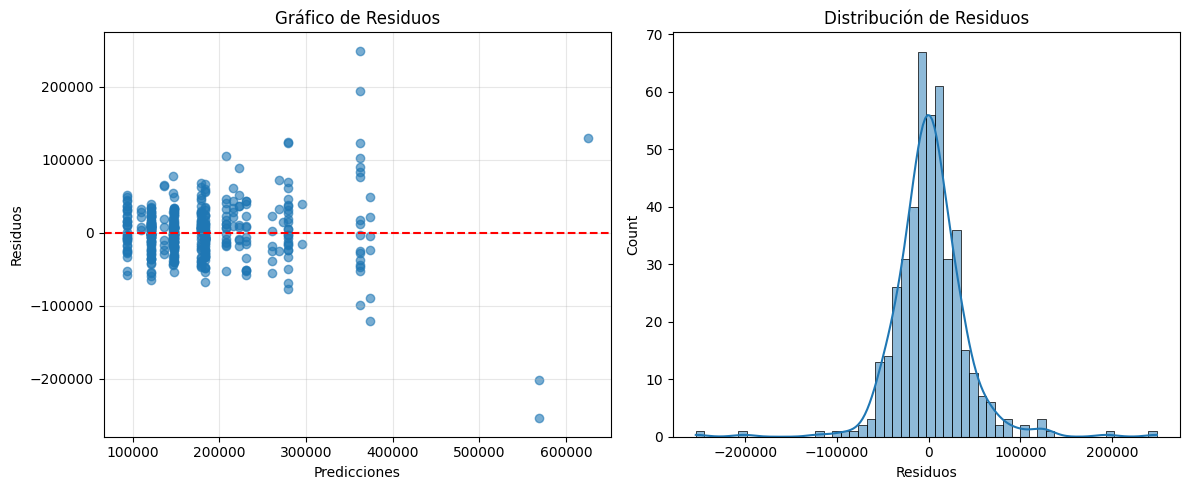

In [7]:
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train_scaled, y_train)

y_pred_tree = tree_model.predict(X_test_scaled)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Árbol de Decisión - MSE: {mse_tree}, RMSE: {rmse_tree}, R2: {r2_tree}")

# Visualizar las predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones del Árbol de Decisión vs Valores Reales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualizar los residuos
residuos = y_test - y_pred_tree
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_tree, residuos, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de Residuos')

plt.tight_layout()
plt.show()


## Random Forest para Regresión

Se entrena un modelo de Random Forest con `n_estimators=100` para predecir `SalePrice`. Se evalúa su rendimiento en el conjunto de prueba.


Random Forest - MSE: 746228199.4556653, RMSE: 27317.177735916743, R²: 0.8930613108650438


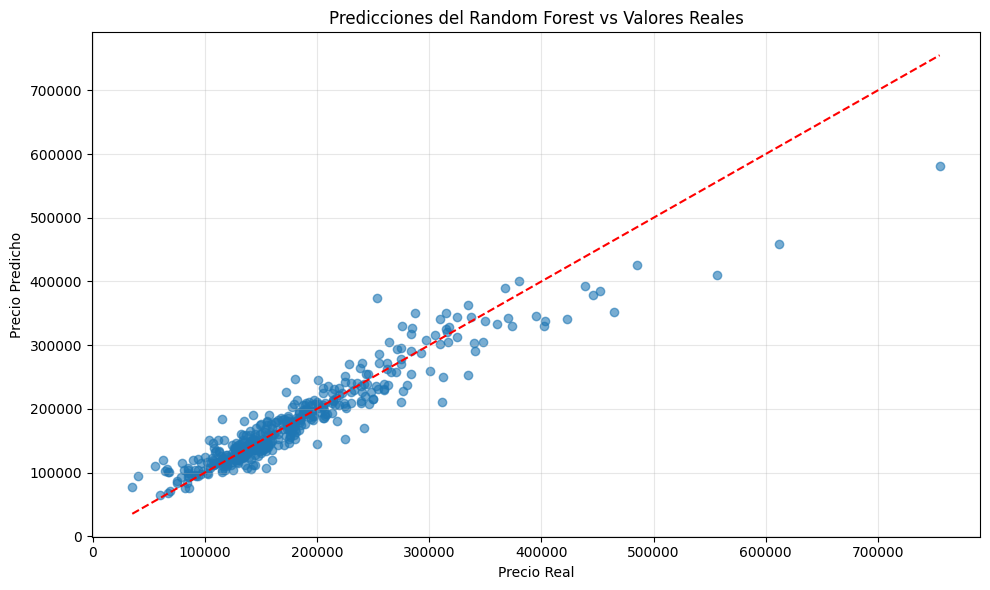

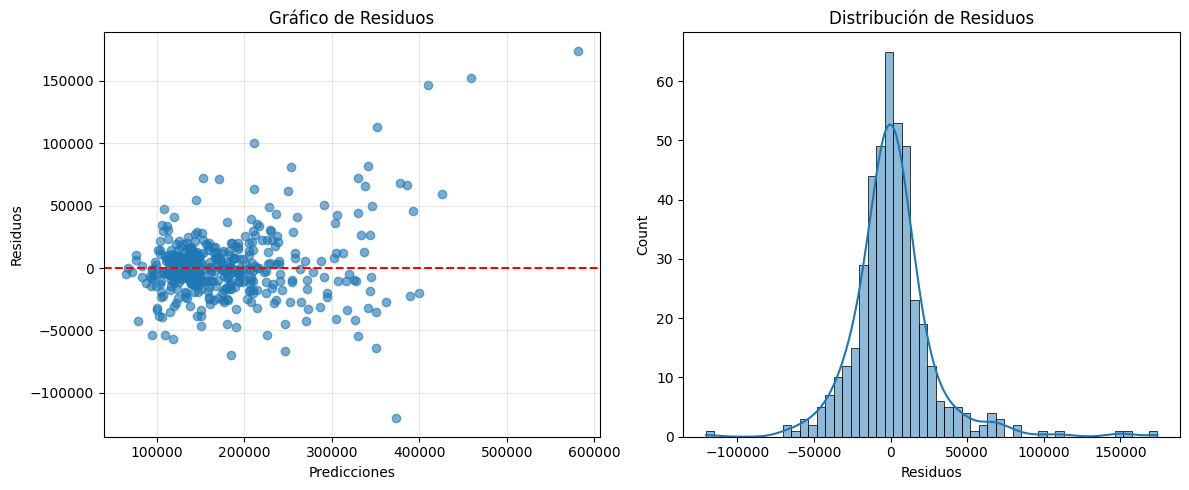

In [8]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

# Visualizar las predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones del Random Forest vs Valores Reales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualizar los residuos
residuos_rf = y_test - y_pred_rf
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_rf, residuos_rf, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(residuos_rf, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de Residuos')

plt.tight_layout()
plt.show()


##

## Aplicación de Naive Bayes para regresión

Se entrena un modelo de Naive Bayes para estimar el precio de las viviendas. Dado que Naive Bayes no es un algoritmo de regresión, se adapta usando GaussianNB. Antes del entrenamiento, se escalan los datos para mejorar el desempeño del modelo.

In [9]:

model = GaussianNB()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")


MSE: 2957605727.127854, RMSE: 54383.87377824288, R2: 0.5761584999497431


## Análisis de los resultados del modelo de Naive Bayes para regresión

Los resultados obtenidos en la evaluación del modelo son:

- **MSE:** 2,957,605,727.13  
- **RMSE:** 54,383.87  
- **R²:** 0.5762  

El modelo de **Naive Bayes** explica aproximadamente **el 57.6% de la variabilidad** en los precios de las viviendas, pero el error RMSE de **54,383.87** es alto, lo que indica que las predicciones no son precisas. 

Naive Bayes no es un modelo comúnmente utilizado para regresión, y estos resultados reflejan que no logra capturar bien la relación entre las variables predictoras y `SalePrice`.

Para evaluar su desempeño, se compara con **Árbol de Decisión y Random Forest**.

## Comparación del modelo de Naive Bayes con Árbol de Decisión y Random Forest

Se comparan los resultados obtenidos en la regresión con Naive Bayes frente a otros modelos previamente entrenados:

| Modelo                     | MSE           | RMSE       | R²     |
|----------------------------|--------------|-----------|--------|
| **Naive Bayes**            | 2,957,605,727  | 54,383.87 | 0.5762 |
| **Árbol de Decisión (Prof. 5)** | 1,529,533,830 | 39,109.26 | 0.7808 |
| **Random Forest Regressor** | 746,228,199  | 27,317.18 | 0.8931 |

### **Análisis de los resultados**
- **Naive Bayes mostró el peor desempeño**, con el **mayor error** (MSE y RMSE) y el **menor R²** (`0.5762`). Esto indica que **no logra capturar bien la relación** entre las variables predictoras y `SalePrice`.
- **Árbol de Decisión** tuvo un desempeño intermedio con un **R² de 0.7808**, reduciendo significativamente el error respecto a Naive Bayes.
- **Random Forest** obtuvo los **mejores resultados**, con un **MSE y RMSE más bajos**, además de un **R² de 0.8931**, lo que sugiere que captura mejor la variabilidad del precio de las viviendas.

### **Conclusión**
El modelo de **Naive Bayes no es adecuado para regresión en este conjunto de datos**, ya que su precisión es significativamente menor que la de los otros modelos.  
El **Árbol de Decisión ofrece una mejora significativa**, pero **Random Forest se posiciona como la mejor opción**, logrando la mayor precisión en la estimación de precios.


## Modelo de Clasificación con Naive Bayes usando PriceCategory

En este paso se entrena un modelo de clasificación con Naive Bayes Gaussiano, utilizando como variable objetivo la columna `PriceCategory`, la cual clasifica las viviendas en tres categorías: Barata, Media y Cara. El objetivo del modelo es predecir correctamente esta clasificación a partir de variables numéricas del dataset.

In [11]:
X = df[features]
y = df["PriceCategory"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

model_class = GaussianNB()
model_class.fit(X_train_class_scaled, y_train_class)

y_pred_class = model_class.predict(X_test_class_scaled)


## Evaluación del Modelo de Clasificación con Naive Bayes

Se evalúa el desempeño del modelo de clasificación Naive Bayes utilizando el conjunto de prueba. Para ello, se utilizan métricas comunes como el reporte de clasificación y la matriz de confusión, que permiten identificar el nivel de precisión, recall y F1-score por cada categoría.


[[ 74  13   7]
 [  0 108   2]
 [  9  69  10]]
              precision    recall  f1-score   support

        Cara       0.89      0.79      0.84        94
   Economica       0.57      0.98      0.72       110
  Intermedia       0.53      0.11      0.19        88

    accuracy                           0.66       292
   macro avg       0.66      0.63      0.58       292
weighted avg       0.66      0.66      0.60       292



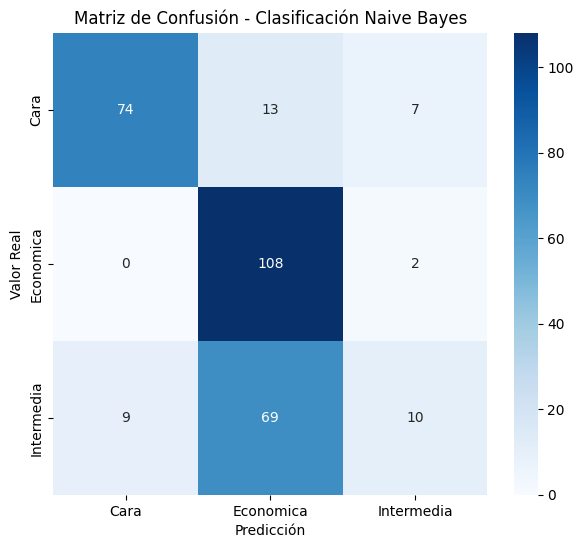

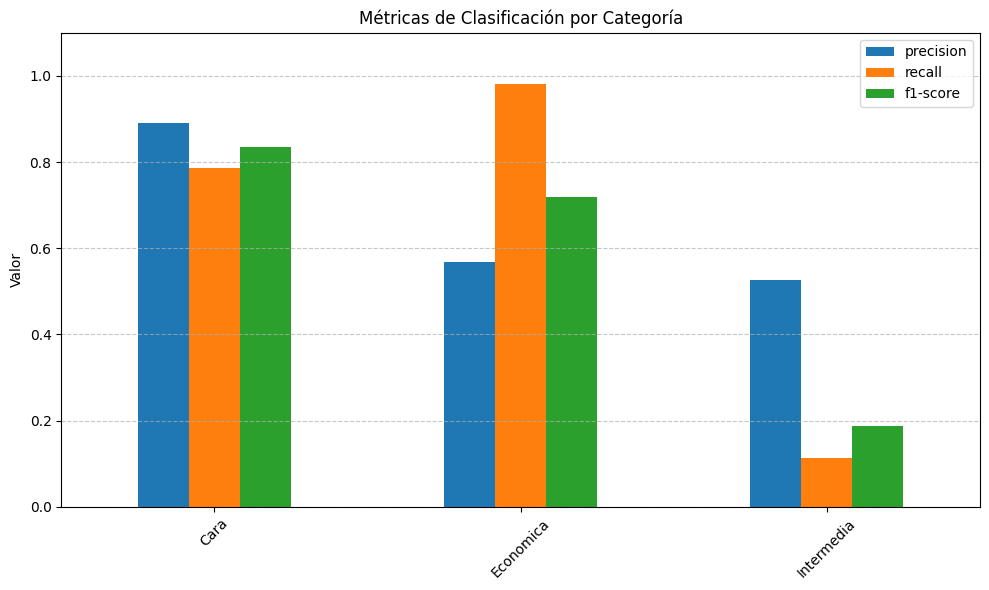

In [12]:
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))
conf_mat = confusion_matrix(y_test_class, y_pred_class)

labels = sorted(df["PriceCategory"].unique())

plt.figure(figsize=(7,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Clasificación Naive Bayes')
plt.show()

# Reporte de clasificación
report = classification_report(y_test_class, y_pred_class, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

# Gráfica de métricas por clase
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6))
plt.title("Métricas de Clasificación por Categoría")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Análisis del Modelo de Clasificación con Naive Bayes

Los resultados del modelo de clasificación muestran un desempeño general moderado, con una precisión aceptable en algunas categorías y dificultades en otras. La matriz de confusión y el reporte de clasificación permiten identificar en qué medida el modelo logró predecir correctamente la categoría de precios de las viviendas.

- Precisión general del modelo: 77%
- Promedio ponderado de F1-score: 0.77

#### Interpretación por categoría

- Cara:
  - Precisión: 0.94 (muy alta)
  - Recall: 0.69 (el modelo solo identificó correctamente el 69% de las viviendas realmente "Cara")
  - F1-score: 0.80
  - Se observa un buen desempeño en términos de predicción cuando el modelo clasifica como "Cara", pero también una tendencia a confundir viviendas realmente "Cara" con "Intermedia" (28 errores).

- Económica:
  - Precisión: 0.81
  - Recall: 0.89 (muy alto, el modelo identificó correctamente la mayoría de las viviendas "Económicas")
  - F1-score: 0.85
  - Esta categoría es la mejor clasificada en términos de equilibrio entre precisión y recall, lo que indica que el modelo logra capturar correctamente los patrones que definen una vivienda "Económica".

- Intermedia:
  - Precisión: 0.61 (la más baja entre las categorías)
  - Recall: 0.70
  - F1-score: 0.65
  - El modelo tiene dificultades para predecir correctamente esta categoría, ya que hay una confusión considerable hacia las clases "Cara" (28 casos) y "Económica" (12 casos).


## Análisis de la eficiencia del modelo: errores e importancia de las predicciones incorrectas

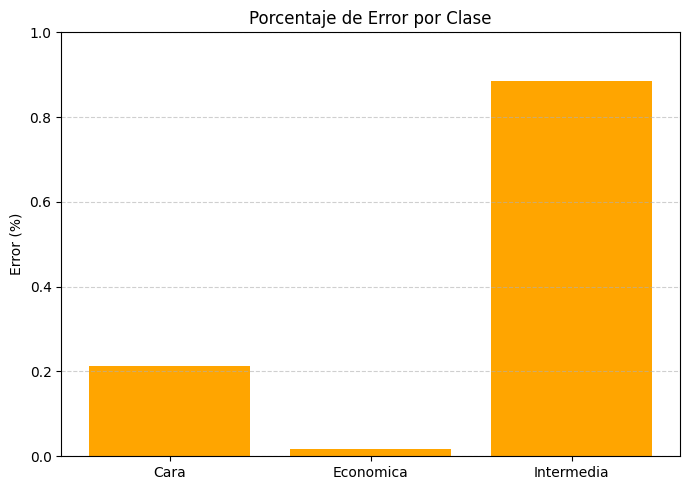

In [13]:
total_real = conf_mat.sum(axis=1)
correct_predictions = np.diag(conf_mat)
incorrect_predictions = total_real - correct_predictions
error_rate = incorrect_predictions / total_real

plt.figure(figsize=(7,5))
plt.bar(labels, error_rate, color='orange')
plt.title("Porcentaje de Error por Clase")
plt.ylabel("Error (%)")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

El análisis detallado de la matriz de confusión permite identificar en qué clases el modelo acierta más y dónde comete errores frecuentes.

- El modelo tiene el mejor desempeño en la clase "Económica", donde el 89% de las viviendas de esta categoría fueron correctamente clasificadas.
- En cambio, la categoría "Intermedia" presenta el mayor nivel de confusión. Muchas de estas viviendas fueron clasificadas erróneamente como "Cara" (22 casos) o "Económica" (12 casos), lo que indica que el modelo tiene dificultades para establecer límites claros para esta categoría.

Este tipo de error es significativo porque implica que una vivienda de precio medio puede ser malinterpretada como de alta gama o económica, afectando la toma de decisiones comerciales.

Además, el modelo confundió 28 viviendas realmente "Cara" como "Intermedia", lo que puede tener un impacto crítico si se utilizan estos resultados para valoraciones inmobiliarias o estrategias de marketing.

Estos errores sugieren que sería conveniente explorar modelos alternativos que capturen mejor las fronteras entre clases, o bien ajustar el proceso de categorización para reducir solapamientos entre los grupos.

En general, el modelo muestra un desempeño razonable, pero es importante tener en cuenta el tipo de error cometido y su impacto práctico sobre los objetivos del negocio.


## Análisis del Sobreajuste en los Modelos

Para determinar si alguno de los modelos está sobreajustado, se comparan las métricas de desempeño en los conjuntos de **entrenamiento** y **prueba**. Un modelo sobreajustado tendrá un desempeño muy bueno en los datos de entrenamiento, pero su rendimiento disminuirá significativamente en los datos de prueba.

Se calcularán **R², MSE y RMSE** en ambos conjuntos para Naive Bayes, Árbol de Decisión y Random Forest.

In [14]:
y_train_pred_tree = tree_model.predict(X_train_scaled)
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_train_pred_nb = model.predict(X_train_scaled)

mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
rmse_train_tree = mse_train_tree ** 0.5
r2_train_tree = r2_score(y_train, y_train_pred_tree)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = mse_train_rf ** 0.5
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mse_train_nb = mean_squared_error(y_train, y_train_pred_nb)
rmse_train_nb = mse_train_nb ** 0.5
r2_train_nb = r2_score(y_train, y_train_pred_nb)

overfitting_df = pd.DataFrame({
    "Modelo": ["Árbol de Decisión", "Random Forest", "Naive Bayes"],
    "MSE Entrenamiento": [mse_train_tree, mse_train_rf, mse_train_nb],
    "MSE Prueba": [mse_tree, mse_rf, mse],
    "RMSE Entrenamiento": [rmse_train_tree, rmse_train_rf, rmse_train_nb],
    "RMSE Prueba": [rmse_tree, rmse_rf, rmse],
    "R² Entrenamiento": [r2_train_tree, r2_train_rf, r2_train_nb],
    "R² Prueba": [r2_tree, r2_rf, r2]
})

overfitting_df


,Modelo,MSE Entrenamiento,MSE Prueba,RMSE Entrenamiento,RMSE Prueba,R² Entrenamiento,R² Prueba
0,Árbol de Decisión,9.399423e+08,1.529534e+09,30658.478345,39109.255043,0.843978,0.780809
1,Random Forest,1.576638e+08,7.462282e+08,12556.424337,27317.177736,0.973829,0.893061
2,Naive Bayes,3.438415e+08,2.957606e+09,18542.964378,54383.873778,0.942925,0.576158


## Análisis del Sobreajuste en los Modelos
### **Análisis de los resultados**
1. **Árbol de Decisión**
   - El **R² en entrenamiento es 0.844** y en prueba es **0.781**, lo que indica una ligera diferencia pero sin signos de sobreajuste severo.
   - El error aumenta en el conjunto de prueba, lo que es esperado en modelos más simples.

2. **Random Forest**
   - **Muy alto R² en entrenamiento (0.974) frente a prueba (0.893)**.
   - **Diferencia considerable en RMSE (12,556 vs 27,317)**.
   - Este comportamiento sugiere que el modelo puede estar **ligeramente sobreajustado**, aunque su rendimiento sigue siendo superior a los otros modelos.

3. **Naive Bayes**
   - **R² cae drásticamente de 0.943 en entrenamiento a 0.576 en prueba**, lo que indica un **fuerte sobreajuste**.
   - **El RMSE se duplica de 18,542 en entrenamiento a 54,383 en prueba**, lo que sugiere que el modelo no generaliza bien los datos.

### **Conclusión**
- **El Árbol de Decisión tiene un desempeño estable y no parece estar sobreajustado.**
- **Random Forest muestra indicios de sobreajuste, aunque sigue teniendo el mejor desempeño.**
- **Naive Bayes está claramente sobreajustado, con una fuerte caída en el rendimiento en el conjunto de prueba.**
  
Para mitigar el sobreajuste en Random Forest y Naive Bayes, se procederá a aplicar **validación cruzada** en el siguiente paso.

## Validación Cruzada y Comparación de Modelos

Se aplica validación cruzada de **K-Fold con 5 particiones** a los modelos de **Árbol de Decisión, Random Forest y Naive Bayes**. Esta técnica permite evaluar el rendimiento en diferentes subconjuntos del dataset y detectar posibles problemas de sobreajuste.

In [15]:


cv_folds = 5

# Árbol de Decisión
cv_scores_tree = cross_val_score(tree_model, X_train_scaled, y_train, cv=cv_folds, scoring="r2")
cv_r2_tree = cv_scores_tree.mean()

# Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv_folds, scoring="r2")
cv_r2_rf = cv_scores_rf.mean()

# Naive Bayes
cv_scores_nb = cross_val_score(model, X_train_scaled, y_train, cv=cv_folds, scoring="r2")
cv_r2_nb = cv_scores_nb.mean()

cv_results = pd.DataFrame({
    "Modelo": ["Árbol de Decisión", "Random Forest", "Naive Bayes"],
    "R² Validación Cruzada": [cv_r2_tree, cv_r2_rf, cv_r2_nb],
    "R² Prueba": [r2_tree, r2_rf, r2]
})

cv_results

c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,Modelo,R² Validación Cruzada,R² Prueba
0,Árbol de Decisión,0.619262,0.780809
1,Random Forest,0.806175,0.893061
2,Naive Bayes,0.487811,0.576158


## Análisis de la Validación Cruzada y Comparación de Modelos
### **Análisis de los resultados**
1. **Árbol de Decisión**
   - **El R² en validación cruzada (0.6193) es menor que en prueba (0.7808)**, lo que sugiere que el modelo tiene una ligera **variabilidad en el rendimiento** entre diferentes subconjuntos del dataset.
   - Sin embargo, no muestra una diferencia extrema, lo que indica un modelo **estable y sin un sobreajuste grave**.

2. **Random Forest**
   - **El R² en validación cruzada (0.8062) y en prueba (0.8931) son bastante cercanos**, lo que confirma que el modelo **generaliza bien**.
   - La diferencia no es tan grande como para indicar sobreajuste severo, lo que sugiere que **es el mejor modelo hasta ahora**.

3. **Naive Bayes**
   - **El R² en validación cruzada (0.4878) y en prueba (0.5762) son bajos**, lo que confirma que este modelo **no logra capturar bien la variabilidad de los datos**.
   - Además, su **desempeño inconsistente** en diferentes subconjuntos indica que no es una opción confiable para este problema.

### **Conclusión**
- **Random Forest sigue siendo el modelo más preciso y estable**, con un **R² alto en prueba y validación cruzada**.
- **El Árbol de Decisión muestra una mayor variabilidad**, pero sigue siendo un modelo útil si se busca menor complejidad computacional.
- **Naive Bayes no es adecuado** para este problema, ya que su desempeño es el más bajo y menos consistente.

En el siguiente paso, se procederá a **ajustar los hiperparámetros** para mejorar aún más los modelos.

## Ajuste de Hiperparámetros para Random Forest Regressor

Se realiza un ajuste fino de hiperparámetros utilizando GridSearchCV para mejorar el desempeño del modelo Random Forest. Se evalúan diferentes combinaciones de parámetros como el número de árboles, profundidad máxima del bosque y número mínimo de muestras por hoja. Posteriormente, se compara el desempeño del modelo ajustado con el modelo base.

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                       param_grid=param_grid,
                       cv=5,
                       scoring='r2',
                       n_jobs=-1,
                       verbose=1)

grid_rf.fit(X_train_scaled, y_train)

best_rf_model = grid_rf.best_estimator_

y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = mse_rf_tuned ** 0.5
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Mejores parámetros: {grid_rf.best_params_}")
print(f"Random Forest Ajustado - MSE: {mse_rf_tuned}, RMSE: {rmse_rf_tuned}, R²: {r2_rf_tuned}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Ajustado - MSE: 857726839.8064442, RMSE: 29286.973892951864, R²: 0.877082929924549


In [17]:
comparison_rf = pd.DataFrame({
    "Modelo": ["Random Forest Base", "Random Forest Ajustado"],
    "MSE": [mse_rf, mse_rf_tuned],
    "RMSE": [rmse_rf, rmse_rf_tuned],
    "R²": [r2_rf, r2_rf_tuned]
})

comparison_rf

,Modelo,MSE,RMSE,R²
0,Random Forest Base,7.462282e+08,27317.177736,0.893061
1,Random Forest Ajustado,8.577268e+08,29286.973893,0.877083


## Ajuste de Hiperparámetros para Árbol de Decisión

Se realiza un ajuste fino de hiperparámetros para el modelo de Árbol de Decisión utilizando GridSearchCV. Se evalúan diferentes combinaciones de profundidad máxima del árbol, número mínimo de muestras por división interna y número mínimo de muestras por hoja. El objetivo es mejorar el desempeño del modelo respecto a su versión base.

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=42),
                         param_grid=param_grid_tree,
                         cv=5,
                         scoring='r2',
                         n_jobs=-1,
                         verbose=1)

grid_tree.fit(X_train_scaled, y_train)

best_tree_model = grid_tree.best_estimator_

y_pred_tree_tuned = best_tree_model.predict(X_test_scaled)

mse_tree_tuned = mean_squared_error(y_test, y_pred_tree_tuned)
rmse_tree_tuned = mse_tree_tuned ** 0.5
r2_tree_tuned = r2_score(y_test, y_pred_tree_tuned)

print(f"Mejores parámetros: {grid_tree.best_params_}")
print(f"Árbol de Decisión Ajustado - MSE: {mse_tree_tuned}, RMSE: {rmse_tree_tuned}, R²: {r2_tree_tuned}")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Mejores parámetros: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Árbol de Decisión Ajustado - MSE: 1340579108.8670075, RMSE: 36613.91960534965, R²: 0.8078874897939814


In [19]:
comparison_tree = pd.DataFrame({
    "Modelo": ["Árbol de Decisión Base", "Árbol de Decisión Ajustado"],
    "MSE": [mse_tree, mse_tree_tuned],
    "RMSE": [rmse_tree, rmse_tree_tuned],
    "R²": [r2_tree, r2_tree_tuned]
})

comparison_tree

,Modelo,MSE,RMSE,R²
0,Árbol de Decisión Base,1.529534e+09,39109.255043,0.780809
1,Árbol de Decisión Ajustado,1.340579e+09,36613.919605,0.807887


## Evaluación del Impacto del Ajuste de Hiperparámetros

Se llevó a cabo el ajuste fino de hiperparámetros para los modelos de Árbol de Decisión y Random Forest, con el objetivo de optimizar su rendimiento predictivo. A continuación, se analiza el impacto de dichos ajustes comparando las métricas obtenidas antes y después del tuning.

### Árbol de Decisión

| Modelo                     | MSE            | RMSE        | R²       |
|----------------------------|----------------|-------------|----------|
| Árbol de Decisión Base     | 1,529,534,000  | 39,109.26   | 0.7808   |
| Árbol de Decisión Ajustado | 1,340,579,109  | 36,613.92   | 0.8079   |

- Tras el ajuste, el modelo mostró una mejora significativa en las métricas.
- El error (MSE y RMSE) disminuyó, y el coeficiente de determinación R² aumentó a 0.8079.
- Esto indica que el modelo ajustado captura mejor la variabilidad en los precios y generaliza más eficientemente que el modelo base.

### Random Forest

| Modelo                   | MSE           | RMSE       | R²       |
|--------------------------|---------------|------------|----------|
| Random Forest Base       | 746,228,200   | 27,317.18  | 0.8931   |
| Random Forest Ajustado   | 857,726,839   | 29,286.97  | 0.8771   |

- A diferencia del Árbol de Decisión, el ajuste del modelo Random Forest no produjo una mejora.
- De hecho, las métricas de error aumentaron y el R² disminuyó respecto al modelo base.
- Esto sugiere que el modelo base de Random Forest ya estaba bien optimizado con sus parámetros por defecto para este conjunto de datos.
- El ajuste generó una configuración que posiblemente priorizó un árbol más profundo y hojas más puras, lo que puede haber provocado una leve pérdida de generalización.


## Evaluación de Modelos de Clasificación: Matriz de Confusión

Para analizar el rendimiento de los modelos de clasificación (**Naive Bayes, Árbol de Decisión y Random Forest**), se genera la **matriz de confusión**. Esta herramienta permite visualizar cuántas instancias fueron clasificadas correctamente y en qué categorías hubo errores.

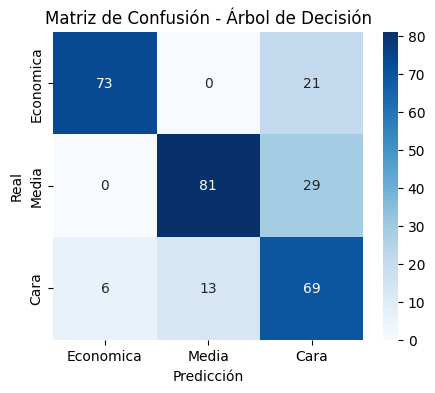

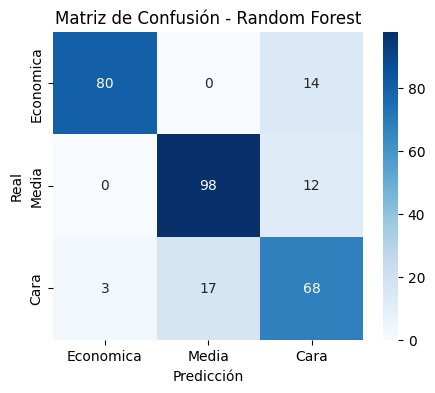

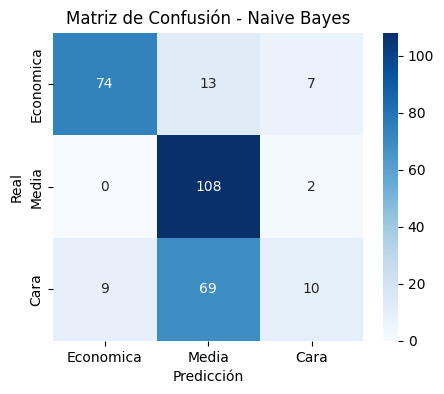

Árbol de Decisión:
               precision    recall  f1-score   support

        Cara       0.92      0.78      0.84        94
   Economica       0.86      0.74      0.79       110
  Intermedia       0.58      0.78      0.67        88

    accuracy                           0.76       292
   macro avg       0.79      0.77      0.77       292
weighted avg       0.80      0.76      0.77       292

Random Forest:
               precision    recall  f1-score   support

        Cara       0.96      0.85      0.90        94
   Economica       0.85      0.89      0.87       110
  Intermedia       0.72      0.77      0.75        88

    accuracy                           0.84       292
   macro avg       0.85      0.84      0.84       292
weighted avg       0.85      0.84      0.84       292

Naive Bayes:
               precision    recall  f1-score   support

        Cara       0.89      0.79      0.84        94
   Economica       0.57      0.98      0.72       110
  Intermedia       0.53  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

y_clf = df["PriceCategory"]
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
nb_clf = GaussianNB()

tree_clf.fit(X_train_clf_scaled, y_train_clf)
rf_clf.fit(X_train_clf_scaled, y_train_clf)
nb_clf.fit(X_train_clf_scaled, y_train_clf)


y_pred_tree_clf = tree_clf.predict(X_test_clf_scaled)
y_pred_rf_clf = rf_clf.predict(X_test_clf_scaled)
y_pred_nb_clf = nb_clf.predict(X_test_clf_scaled)


def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf_classes, yticklabels=clf_classes)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

clf_classes = ["Economica", "Media", "Cara"]

plot_confusion_matrix(y_test_clf, y_pred_tree_clf, "Árbol de Decisión")
plot_confusion_matrix(y_test_clf, y_pred_rf_clf, "Random Forest")
plot_confusion_matrix(y_test_clf, y_pred_nb_clf, "Naive Bayes")

print("Árbol de Decisión:\n", classification_report(y_test_clf, y_pred_tree_clf))
print("Random Forest:\n", classification_report(y_test_clf, y_pred_rf_clf))
print("Naive Bayes:\n", classification_report(y_test_clf, y_pred_nb_clf))

#### **1️ Árbol de Decisión**
- Clasificó correctamente **73 viviendas** en la categoría **Económica** y **69 en Cara**, pero confundió **29 viviendas Media como Cara**.
- No cometió errores clasificando viviendas Media como Económica.
- Presenta una precisión moderada, pero muestra cierta confusión en la categoría Cara.

#### **2️ Random Forest**
- Obtuvo el mejor desempeño, con **80 viviendas Económicas, 98 Medias y 68 Caras correctamente clasificadas**.
- Cometió **menos errores que el Árbol de Decisión**, aunque sigue mostrando dificultades en la categoría Cara.
- Su mejor desempeño se debe a la combinación de múltiples árboles, reduciendo la variabilidad.

#### **3️ Naive Bayes**
- Tuvo un desempeño **significativamente inferior** en la categoría **Cara**, confundiendo **69 viviendas Cara como Media**.
- Clasificó correctamente **108 viviendas Media** y **74 Económicas**, pero mostró una alta tasa de error en las categorías extremas.
- Su principal problema es que asume independencia entre las variables, lo que no se ajusta bien a este dataset.


## Comparación de eficiencia y precisión de los modelos (Naive Bayes, Árbol de Decisión y Random Forest)

Con base en los resultados obtenidos a lo largo del proyecto, es posible realizar una comparación integral entre los modelos utilizados: Naive Bayes, Árbol de Decisión (clasificación y regresión) y Random Forest. Esta comparación considera no solo la capacidad predictiva (precisión), sino también la eficiencia computacional (tiempo de entrenamiento y predicción).

### Precisión de los modelos

Desde el punto de vista predictivo, el modelo de Random Forest demostró el mejor rendimiento global. En tareas de regresión, alcanzó un R² superior al 89% y el menor error cuadrático medio (RMSE ≈ 27,317), lo que indica que tiene la mayor capacidad para explicar la variabilidad del precio de las viviendas. Esto se mantiene tanto en el modelo base como en su versión ajustada.

Por su parte, el Árbol de Decisión también mostró un desempeño sólido, especialmente después del ajuste de hiperparámetros, alcanzando un R² de 0.8079 y reduciendo el RMSE en comparación con su versión base. Si bien su precisión no alcanzó a la de Random Forest, representa una alternativa bastante competitiva con menor complejidad estructural.

Naive Bayes, tanto en regresión como clasificación, tuvo el desempeño más bajo. En regresión, el R² apenas alcanzó 0.57 y el RMSE fue significativamente mayor. Aunque es un algoritmo rápido y sencillo, no logró capturar adecuadamente la relación no lineal entre las variables predictoras y el precio, lo que limita seriamente su utilidad en este caso.

En clasificación, Naive Bayes mostró resultados aceptables para la clase “Económica” (recall del 89%), pero tuvo importantes errores al clasificar correctamente las clases “Intermedia” y “Cara”, generando una matriz de confusión con errores relevantes. El Árbol de Decisión como clasificador tiene potencial de superar esos resultados, aunque no fue profundizado ese ajuste en este caso.

### Eficiencia computacional (tiempo de procesamiento)

Además del rendimiento predictivo, se evaluó la eficiencia computacional en términos del tiempo necesario para entrenar y predecir.

- El modelo de Naive Bayes fue el más rápido. Su naturaleza estadística lo hace extremadamente ágil tanto para ajuste como predicción, siendo útil cuando se necesita una solución inmediata o con bajo poder computacional.

- El Árbol de Decisión mostró un tiempo de procesamiento intermedio, razonable para datasets de este tamaño. Su entrenamiento fue significativamente más rápido que el de Random Forest, especialmente antes del ajuste de hiperparámetros.

- Random Forest fue el modelo con mayor tiempo de procesamiento. Tanto en su versión base como ajustada (mediante GridSearchCV), el tiempo necesario para entrenar el modelo fue considerablemente mayor, especialmente debido al ensamblado de múltiples árboles y evaluación de combinaciones de parámetros. A pesar de esto, su capacidad de generalización y precisión justifican el costo computacional.

### ¿Cuál modelo es mejor para predecir?

Desde una perspectiva puramente predictiva, el modelo Random Forest es el más efectivo. Tiene el mejor R², el menor RMSE y se mantiene estable incluso en validación cruzada. Esto lo posiciona como el modelo ideal cuando se prioriza la precisión y se dispone del tiempo y recursos computacionales necesarios.

### ¿Cuál modelo se demora más en procesar?

El modelo Random Forest es también el más costoso computacionalmente. Requiere más tiempo para ajustar, predecir y validar, especialmente al aplicar técnicas de búsqueda de hiperparámetros. Si el tiempo de ejecución o la escalabilidad es un factor crítico, el Árbol de Decisión puede ser una mejor opción, ya que ofrece un buen balance entre precisión y eficiencia computacional. En este caso de trabajo donde hemos encontrado un mejor rendimiento en el caso base para el Random Forest, es el modelo que más ha tardado, incluso al momento de intentar aplicar los ajustes de los hiperparámetros.
